<a href="https://colab.research.google.com/github/no-akatsu/training/blob/main/241008_%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0_%E3%82%B9%E3%82%AF%E3%83%A9%E3%83%83%E3%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [9]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e9f3baac060f208b4e99f928643eb2b9b751936bf904ca01f01c522c773c85fc
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model

In [12]:
# ロジスティック回帰クラスの定義
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr # 学習率
        self.epochs = epochs # エポック数
        self.W = None # 重み
        self.b = None # バイアス

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # シグモイド関数

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features) # 重みの初期化
        self.b = 0 # バイアスの初期化

        # トレーニングループ
        for epoch in range(self.epochs):
            # 線形結合
            linear_model = np.dot(X, self.W) + self.b

            # シグモイド関数を通して予測値を得る
            y_predicted = self.sigmoid(linear_model)

            # 勾配の計算
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # 重みとバイアスの更新
            self.W -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0) # 閾値でクラスを決定

In [13]:
# Irisデータ
iris = load_iris()
X = iris.data[iris.target != 2] # 2種類の花(setosaとversicolor)のみを選択
y = iris.target[iris.target != 2] # 0または1のラベル

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徴量のスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの作成と学習
model = LogisticRegression(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

# 学習後の重みとバイアス
print('学習された重み（W）', model.W)
print('学習されたバイアス（b）', model.b)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred)
print('Accuracy', accuracy)

学習された重み（W） [ 1.1454959  -1.60267015  2.05590275  2.07887442]
学習されたバイアス（b） 0.37318583074019557
Accuracy 0.4


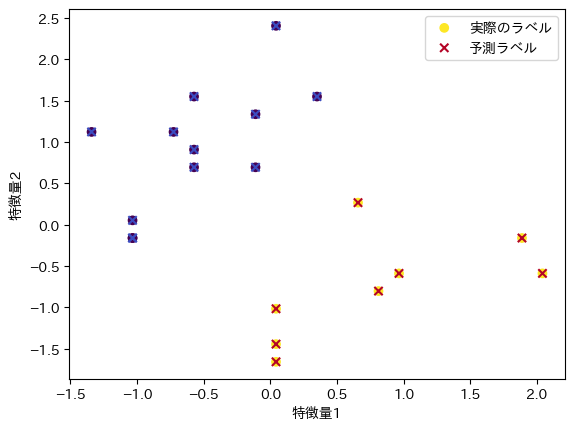

In [14]:
# 結果のプロット
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='実際のラベル')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='予測ラベル')
plt.xlabel('特徴量1')
plt.ylabel('特徴量2')
plt.legend()
plt.show()